# Criticality Assessment
In this notebook, the methodology for calculating the criticality is outlined, including the steps needed to evaluate it and the plot of the criticality matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#data

lithium = [1101.15,0.6,3417,81.6,77.73142857,60.1,0.951,2400000,1469830,0,13,136,491,5,79.6]
cobalt=[49.306,0.5505,4839,6.13,21.3,36.9,0.479,548178,68421,0,27,195,462,30,45.3]
nickel=[35.9494,1.0485,1541,73.58,70.1866,50,0.936,884243,24000,0,40,122,99,68,14.65]
cadmium=[3.1222,0.2,1715,28.3,15.73,28.4,0.768,45134,27165,0,26,224,12.5,23,5.42]
aluminium=[469.46,32,1782,81.6,77.73142857,60.1,0.951,146967,182337,148800000,6,49.4,9,76,12.6]
iron = [71.3,47.5,1969,81.6,77.73142857,60.1,0.951,7061000,1765230,0,0,253,1,60,2.25]
copper=[37.297,2.65,1159,51.54,46.68,46.7,0.855,15252000,1825950,0,60,46.2,7,40,5.04]
manganese=[67.97752809,0.1505,1560,19.81,29.65,37.2,0.713,4717100,698173,0,92,170,4,37,4.88]
r_EV = [101,0,3570,28.3,71,77.7,0.94,0,0,1000000,0,100,904.6,100,1]


In [203]:
def calculate_combined_risk(material, name ="name"):
    
    """
    Calculates the criticality for materials, including the scores for supply risk, vulnerability and environmental concern.
    
    Inputs: 
    -data for material 
    -name of the material for matrix
    
    Outputs: 
    -criticality scores
    -matrix to represent data visually
    """
    #Supply Risk
    
    # Scarcity
    DT = material[0]
    if DT > 100:
        DT_n = 0
    else:
        DT_n = (100 - 0.2 * DT - 0.008 * DT ** 2) / 100
    
    # By-product dependence
    BPD = material[1]
    BPD_n = 1 - BPD / 100
    
    # Concentration
    HHI = material[2]
    HHI_n = (1 / 100) * (17.5 * np.log(HHI) - 61.18)
    
    # Political instability for the UK
    WGI = material[3]
    WGI_n = WGI/100
    
    # Vulnerability
    
    # Regulation
    PPI = material[4]
    PPI_n = (1 / 100) * (100 - PPI)
    
    EPI = material[5]
    EPImax = 100
    EPImin = 0
    
    EPI_ = (EPI-EPImin)/(EPImax-EPImin)
    EPI_n = (1 - EPI_)
    
    HDI = material[6]
    maxHDI = 0.967
    minHDI = 0.380
    
    HDI_n = (HDI-minHDI)/(maxHDI-minHDI)
    reg_n = (WGI_n + PPI_n + HDI_n) / 3
    
    # Import dependence
    imports = material[7]
    exports = material[8]
    dom_prod = material[9]
    net_import_dep = (imports - exports) / (dom_prod + imports - exports)
    
    # Substitutability
    sub = material[10] / 100
    
    # Price volatility
    #vol = material[11]
    #vol_n = (1 / 500) * vol
    volatility = material[11]
    def vol(vol):
        if 0 <= vol <= 150:
            vol_n = 0.6
        elif 150 < vol <= 250:
            vol_n = 0.75
        elif 250 < vol < 300:
            vol_n = 0.9
        elif vol >= 300:
            vol_n = 1
        return vol_n
    
    vol_n = vol(volatility)
    
    # Demand growth normalization
    forecast_dem_growth = material[12]
    
    def normalize_dem_growth(forecast_dem_growth):
        if 0 <= forecast_dem_growth <= 50:
            dem_growth_n = 0.4
        elif 50 <= forecast_dem_growth <= 80:
            dem_growth_n = 0.6
        elif 80 <= forecast_dem_growth <= 150:
            dem_growth_n = 0.8
        elif forecast_dem_growth > 150:
            dem_growth_n = 1
        return dem_growth_n
    
    dem_growth_n = normalize_dem_growth(forecast_dem_growth)
    
    # Environmental concern
    
    # Dependence on primary production
    prim_prod = material[13]
    if prim_prod > 50:
        prim_prod_n = 0
    else:
        prim_prod_n = 1 - (prim_prod / 100)
    
    # CO2 emissions
    co2 = material[14]
    co2_n = co2 / 80
    
    # Calculating criticality:
    
    # Calculate supply risk:
    supply_risk = (7/46)*DT_n + (3/46)*BPD_n + (2/46)*HHI_n + (3/46)*WGI_n
    supply_risk_n = (supply_risk/15)*46
    
    # Calculate vulnerability:
    vulnerability = (6/46)*reg_n + (5/46)*net_import_dep + (3/46)*vol_n + (4/46)*dem_growth_n +(5/46)*sub
    vulnerability_n = (vulnerability/23)*46
    
    # Calculating environmental concern
    enviro = (4/46 *prim_prod_n + 4/46*co2_n)
    enviro_n = (enviro/8)*46
    
    # Normalize and combine
    combined_risk = supply_risk + vulnerability + enviro
    risk_new = (supply_risk_n + vulnerability_n + enviro_n)/3
    
    # Make figure
    fig = plt.figure(figsize=(7, 6)) 
    ax = fig.add_subplot(111, projection='3d')

    # Set the origin as a point
    ax.scatter(0, 0, 0, c='k', marker='.', label='Origin', s=100)

    # Draw lines from the origin to the data point
    ax.quiver(0, 0, 0, supply_risk_n, vulnerability_n, enviro_n, color='b', arrow_length_ratio=0.1, linewidths=2)  
    # Scatter plot (single point)
    ax.scatter(supply_risk_n, vulnerability_n, enviro_n, c='r', marker='', s=100) 

    # Set plot limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)

    # Set axis labels
    ax.set_xlabel('Supply Risk', fontsize=12)  
    ax.set_ylabel('Vulnerability', fontsize=12)
    ax.set_zlabel('Environmental Concern', fontsize=12)

    # Add a legend
    ax.legend(loc="center right", fontsize=12)
    # Adjust the viewing angle 
    ax.view_init(elev=20, azim=30) 

    plt.title(f"Criticality Matrix for {name}", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    return supply_risk_n, vulnerability_n, enviro_n,combined_risk



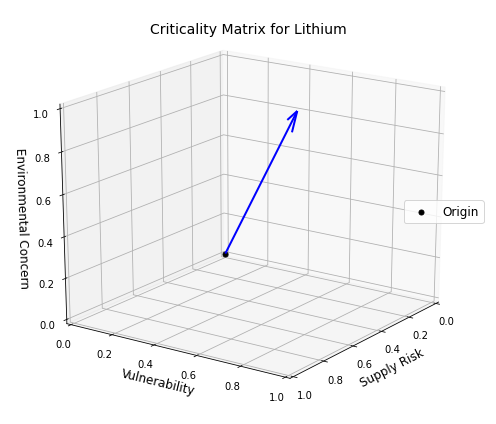

(0.47027875921602347, 0.6727329107909191, 0.9725, 0.6588486594876412)

In [185]:
calculate_combined_risk(lithium,"Lithium")

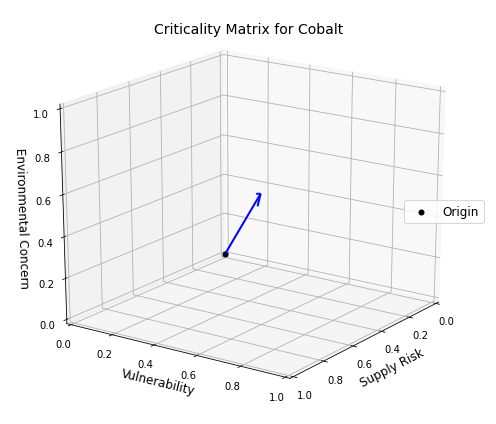

(0.657443830814511, 0.6362568846752092, 0.6331249999999999, 0.6426209958640756)

In [186]:
calculate_combined_risk(cobalt,"Cobalt")

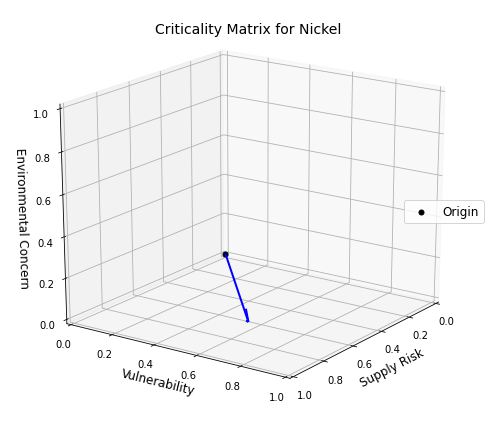

(0.8196265033706961, 0.6940107040959929, 0.09156249999999999, 0.63019877706018)

In [187]:
calculate_combined_risk(nickel,"Nickel")

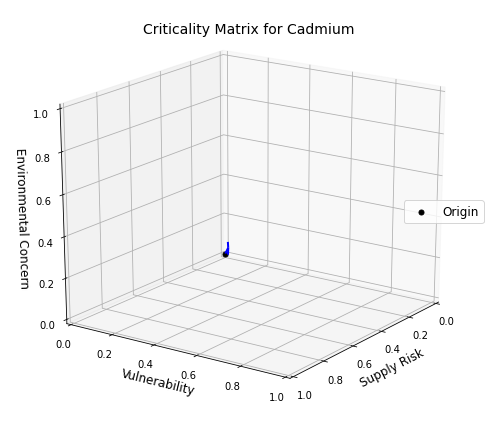

(0.8117826114313076,
 0.5966685282571662,
 0.41887499999999994,
 0.6358938113344443)

In [188]:
calculate_combined_risk(cadmium,"Cadmium")

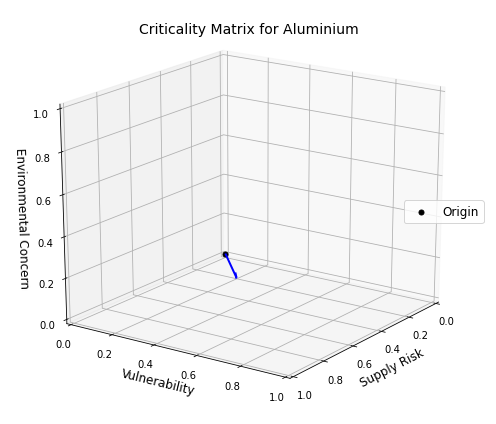

(0.39228813752071756, 0.3357247025021379, 0.07875, 0.30947804826869424)

In [189]:
calculate_combined_risk(aluminium,"Aluminium")

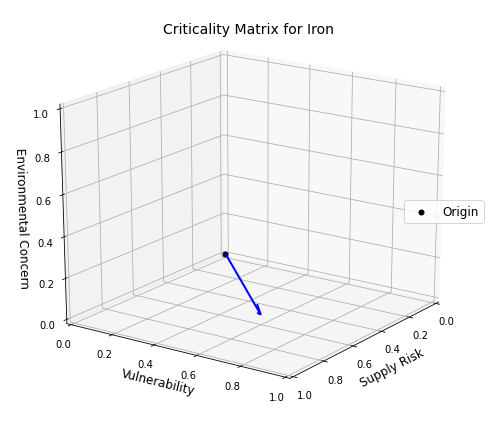

(0.5739454651682463, 0.579254649921354, 0.0140625, 0.47922910708075733)

In [190]:
calculate_combined_risk(iron,"Iron")

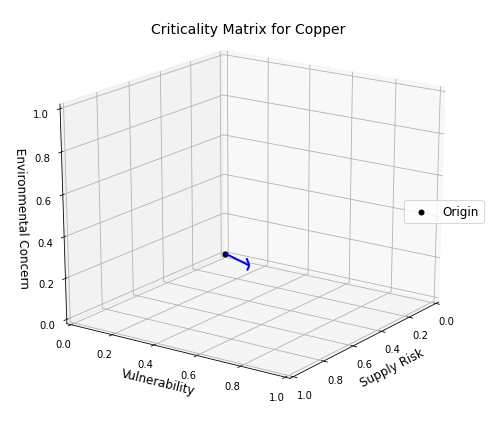

(0.7607536278752609, 0.65719994074513, 0.33149999999999996, 0.634323979462324)

In [191]:
calculate_combined_risk(copper,"Copper")

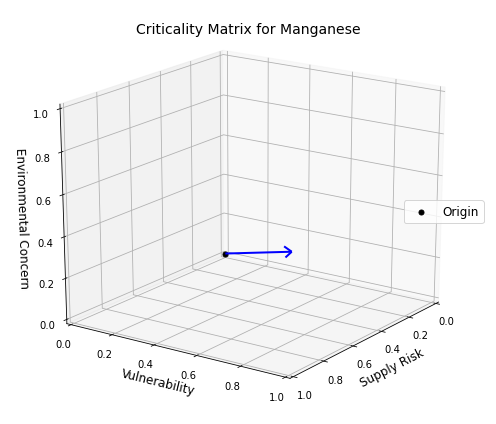

(0.5600083446465518, 0.7125122879786683, 0.3455, 0.5989545172436445)

In [192]:
calculate_combined_risk(manganese,"Manganese")

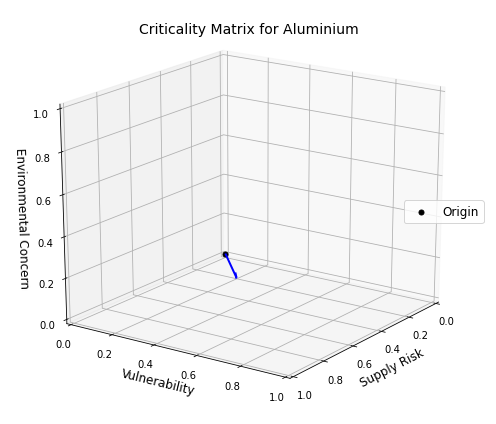

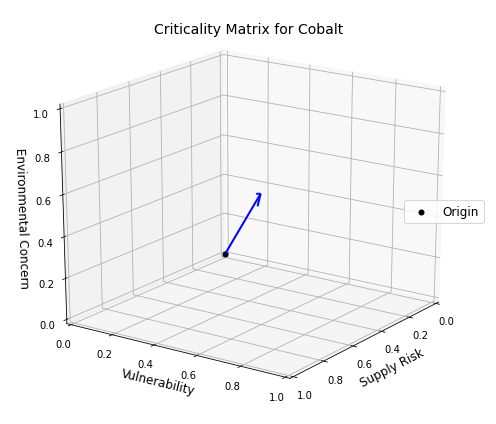

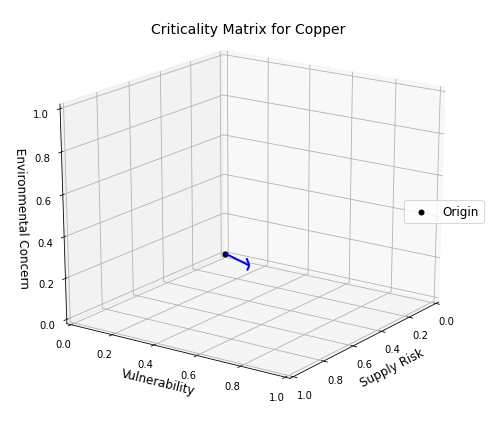

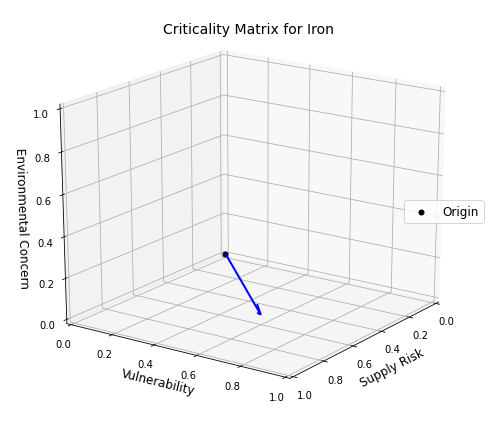

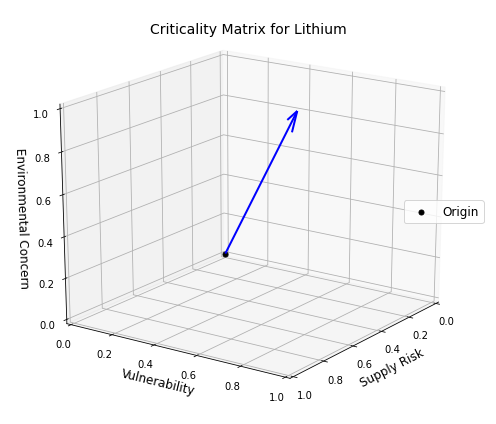

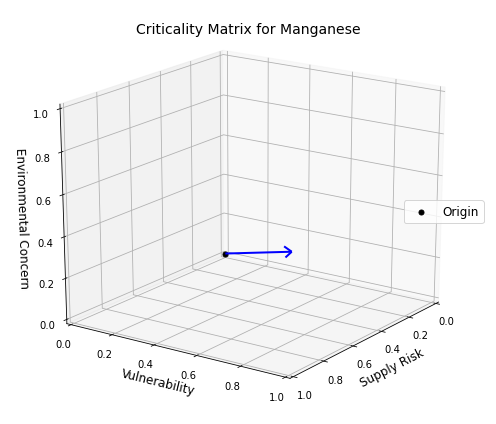

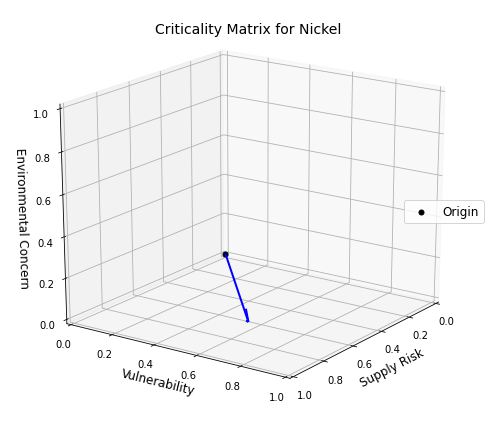

In [193]:
# Calculating overall battery criticality:

alum_c = calculate_combined_risk(aluminium,"Aluminium")[3]
cobalt_c = calculate_combined_risk(cobalt,"Cobalt")[3]
copper_c = calculate_combined_risk(copper,"Copper")[3]
iron_c = calculate_combined_risk(iron,"Iron")[3]
lithium_c = calculate_combined_risk(lithium,"Lithium")[3]
manganese_c = calculate_combined_risk(manganese,"Manganese")[3]
nickel_c = calculate_combined_risk(nickel,"Nickel")[3]


In [194]:
# Calculating overall battery criticality by taking the weighted sum of criticality values.

def battery_criticality(alum,cobalt,copper,iron,lithium,manganese,nickel):
    """
    Calculates the overall battery criticality.
    
    Inputs:
    - the percentage of that material in the battery
    
    Outputs: 
    - criticality
    """
    total_w =  alum+cobalt+copper+iron+lithium+manganese+nickel                
    crit = (alum/total_w)*alum_c + (cobalt/total_w)*cobalt_c + (copper/total_w)*copper_c +(iron/total_w)*iron_c + (lithium/total_w)*lithium_c + (manganese/total_w)*manganese_c +(nickel/total_w)*nickel_c
    return crit
                       

In [195]:
# Battery 1
battery_criticality(21.9,2.3,13.3,0.1,1.9,0,12.1)

0.49645827598029957

In [196]:
# Battery 2
battery_criticality(21.7,0,13.5,0.1,1.4,10.7,0)

0.47802050081581865

In [197]:
# Battery 3
battery_criticality(22.72,8.45,16.6,8.79,1.28,5.86,14.84)

0.5208688590373775

In [198]:
# Battery 4
battery_criticality(5.2,17.3,7.3,16.5,2.0,0,1.2)

0.5522911161171854

In [199]:
# Battery 5
battery_criticality(6.5,0,8.2,43.2,1.2,0,0)

0.48572554589867095

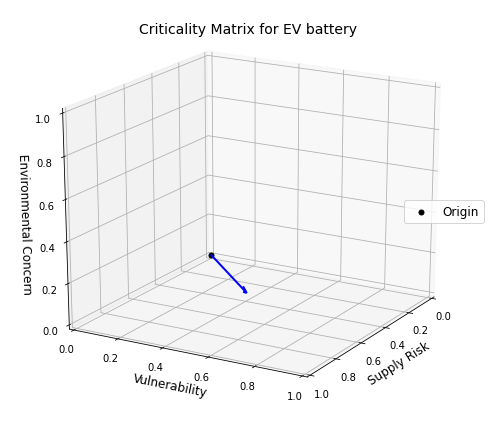

(0.36590082041138605, 0.3849568180134805, 0.00625, 0.31288085044523567)

In [204]:
calculate_combined_risk(r_EV,"EV battery")